In [1]:
# Jupyter magic
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt  # standard Python plotting library

# import the tdt library
import tdt
import pandas as pd

In [2]:
# Must read with "/" not "\
NAc_PATH = 'C:/Users/yongc/Desktop/Exp2 - DA response to Social Defeat/dLight_NAc-240226-045701'
NAc_data = tdt.read_block(NAc_PATH)

Found Synapse note file: C:/Users/yongc/Desktop/Exp2 - DA response to Social Defeat/dLight_NAc-240226-045701\Notes.txt
read from t=0s to t=827.49s


In [3]:
NAc_data.epocs.Cam1.notes

ts:	array([160.9162752 , 174.51728896, 175.59093248, 186.85804544,
       186.98338304, 187.0471168 , 187.11461888, 187.19391744,
       187.5918848 , 188.91669504, 189.44524288, 190.92258816,
       191.91382016, 199.9142912 , 200.91568128, 202.91780608,
       203.78238976, 206.92271104, 210.91991552, 217.91391744,
       218.58582528, 219.9150592 , 220.05628928, 220.58500096,
       220.92316672, 222.92004864, 223.91177216, 224.38854656,
       225.9091456 , 227.04799744, 227.44465408, 230.31201792,
       231.7205504 , 231.84687104, 240.9193472 , 241.72347392,
       271.91230464, 283.90998016, 284.58549248, 296.92411904,
       303.91615488, 310.92523008, 311.19310848, 328.9219072 ,
       328.98564096, 331.91428096, 332.6476288 , 350.92348928,
       351.11665664, 365.19591936, 365.91550464, 407.91556096,
       431.91484416, 432.46125056, 440.92276736, 441.05187328,
       456.92665856, 457.91232   , 478.92348928, 479.7874176 ,
       513.9161088 , 515.38968576, 582.31554048, 58

## Basic Plotting

In [4]:
#Jupyter has a bug that requires import of matplotlib outside of cell with matplotlib inline magic to properly apply rcParams

import matplotlib
matplotlib.rcParams['font.size'] = 18 # set font size for all figures

# Make some variables up here to so if they change in new recordings you won't have to change everything downstream
ISOS = '_405A' # 405nm channel.
DA = '_465A'

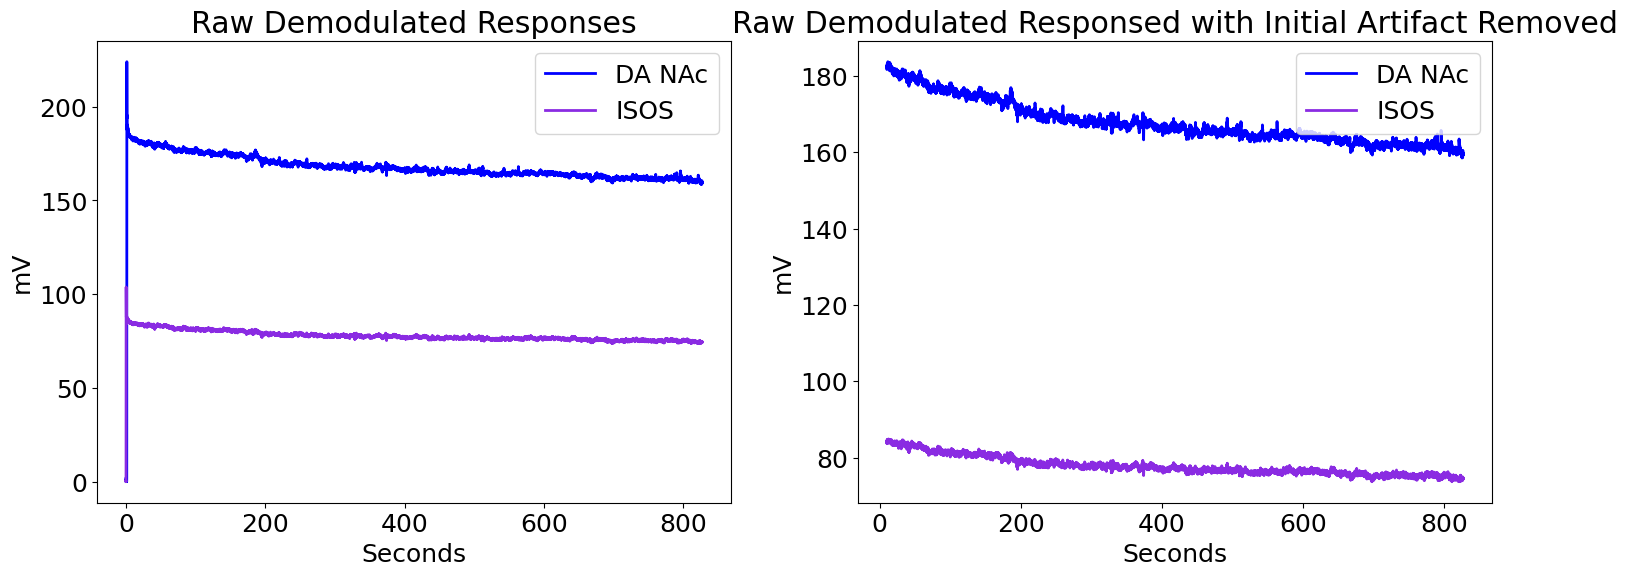

In [5]:
# Make a time array based on the number of samples and sample freq of 
# the demodulated streams
NAc_time = np.linspace(1,len(NAc_data.streams[DA].data), len(NAc_data.streams[DA].data))/NAc_data.streams[DA].fs

# Plot both unprocessed demodulated stream            
fig1 = plt.figure(figsize=(18,6))
ax0 = fig1.add_subplot(121)

# Plotting the traces
p1, = ax0.plot(NAc_time, NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax0.plot(NAc_time, NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax0.set_ylabel('mV')
ax0.set_xlabel('Seconds')
ax0.set_title('Raw Demodulated Responses')
ax0.legend(handles=[p1,p2], loc='upper right')



# There is often a large artifact on the onset of LEDs turning on
# Remove data below a set time t
t = 10
inds = np.where(NAc_time>t)
ind = inds[0][0]
NAc_time = NAc_time[ind:] # go from ind to final index
NAc_data.streams[DA].data = NAc_data.streams[DA].data[ind:]
NAc_data.streams[ISOS].data = NAc_data.streams[ISOS].data[ind:]

# Plot again at new time range
ax1 = fig1.add_subplot(122)

# Plotting the traces
p1, = ax1.plot(NAc_time,NAc_data.streams[DA].data, linewidth=2, color='blue', label='DA NAc')
p2, = ax1.plot(NAc_time,NAc_data.streams[ISOS].data, linewidth=2, color='blueviolet', label='ISOS')

ax1.set_ylabel('mV')
ax1.set_xlabel('Seconds')
ax1.set_title('Raw Demodulated Responsed with Initial Artifact Removed')
ax1.legend(handles=[p1,p2],loc='upper right')
# fig


## Converting Boris Data to Epocs

In [6]:
csv_path = r"C:\Users\yongc\Desktop\Exp2 - DA response to Social Defeat\Adjusted Videos\NAc_CD1_02262024.csv"
bout_df = pd.read_csv(csv_path)

In [7]:
bout_df.head()

,Observation id,Observation date,Description,Observation duration,Observation type,Source,Time offset (s),Media duration (s),FPS,Subject,Behavior,Behavioral category,Behavior type,Time,Media file name,Image index,Image file path,Comment
0,NAc_CD1_02262024,2024-02-26 15:57:25.077,NaN,596.891,Media file(s),player #1:C:/Users/Padilla-Coreano/Desktop/Fib...,0.0,827.519,17.37,subject,anogential sniffing,NaN,START,191.192,C:/Users/Padilla-Coreano/Desktop/Fib Pho Boris...,3321,NaN,NaN
1,NAc_CD1_02262024,2024-02-26 15:57:25.077,NaN,596.891,Media file(s),player #1:C:/Users/Padilla-Coreano/Desktop/Fib...,0.0,827.519,17.37,subject,anogential sniffing,NaN,STOP,191.883,C:/Users/Padilla-Coreano/Desktop/Fib Pho Boris...,3333,NaN,NaN
2,NAc_CD1_02262024,2024-02-26 15:57:25.077,NaN,596.891,Media file(s),player #1:C:/Users/Padilla-Coreano/Desktop/Fib...,0.0,827.519,17.37,subject,face sniffing,NaN,START,200.691,C:/Users/Padilla-Coreano/Desktop/Fib Pho Boris...,3486,NaN,NaN
3,NAc_CD1_02262024,2024-02-26 15:57:25.077,NaN,596.891,Media file(s),player #1:C:/Users/Padilla-Coreano/Desktop/Fib...,0.0,827.519,17.37,subject,face sniffing,NaN,STOP,200.921,C:/Users/Padilla-Coreano/Desktop/Fib Pho Boris...,3490,NaN,NaN
4,NAc_CD1_02262024,2024-02-26 15:57:25.077,NaN,596.891,Media file(s),player #1:C:/Users/Padilla-Coreano/Desktop/Fib...,0.0,827.519,17.37,subject,anogential sniffing,NaN,START,203.339,C:/Users/Padilla-Coreano/Desktop/Fib Pho Boris...,3532,NaN,NaN


fs = Facial Sniffing, 
as = Anogenital Sniffing

In [8]:
fs_onset = []
fs_offset = []
as_onset = []
as_offset = []

In [9]:
fs_onset_values = bout_df[(bout_df['Behavior'] == 'face sniffing') & (bout_df['Behavior type'] == 'START')]['Time'].values
fs_onset = fs_onset_values.tolist()

fs_offset_values = bout_df[(bout_df['Behavior'] == 'face sniffing') & (bout_df['Behavior type'] == 'STOP')]['Time'].values
fs_offset = fs_offset_values.tolist()

as_onset_values = bout_df[(bout_df['Behavior'] == 'anogential sniffing') & (bout_df['Behavior type'] == 'START')]['Time'].values
as_onset = as_onset_values.tolist()

as_offset_values = bout_df[(bout_df['Behavior'] == 'anogential sniffing') & (bout_df['Behavior type'] == 'STOP')]['Time'].values
as_offset = as_offset_values.tolist()

print(fs_onset)
print(fs_offset)
print(as_onset)
print(as_offset)

[200.691, 207.484, 211.457, 241.739, 311.111, 332.585, 351.007, 365.17, 479.102, 515.256, 653.944, 732.412, 759.182, 764.882]
[200.921, 208.117, 211.629, 241.969, 311.572, 333.794, 351.526, 365.688, 479.62, 515.774, 654.174, 732.758, 760.219, 765.343]
[191.192, 203.339, 219.056, 222.395, 226.425, 284.398, 787.565]
[191.883, 203.685, 219.516, 223.143, 230.167, 285.262, 788.083]


In [10]:
FS_EVENT = 'FS_EVENT'
data_arr = []
for i in range(14):
    data_arr.append(1)

FS_DICT = {
        "name":FS_EVENT,
        "onset":fs_onset,
        "offset":fs_offset,
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":data_arr
        }

NAc_data.epocs.FS_EVENT = tdt.StructType(FS_DICT)
FS_EVENT_on = NAc_data.epocs[FS_EVENT].onset
FS_EVENT_off = NAc_data.epocs[FS_EVENT].offset


AS_EVENT = 'AS_EVENT'
data_arr2 = [1, 1, 1, 1, 1, 1, 1]
AS_DICT = {
        "name":AS_EVENT,
        "onset":as_onset,
        "offset":as_offset,
        "type_str":NAc_data.epocs.Cam1.type_str,
        "data":data_arr2
        }

NAc_data.epocs.AS_EVENT = tdt.StructType(AS_DICT)
AS_EVENT_on = NAc_data.epocs[AS_EVENT].onset
AS_EVENT_off = NAc_data.epocs[AS_EVENT].offset

onset_pinch = np.array([808.947])
offset_pinch = onset_pinch + 0.5

PINCH_EVENT = 'PINCH_EVENT'
data_arr3 = [1]
PINCH_DICT = {
        "name":PINCH_EVENT,
        "onset":onset_pinch,
        "offset":offset_pinch,
        "type_str": NAc_data.epocs.Cam1.type_str,
        "data":data_arr3
        }

NAc_data.epocs.PINCH_EVENT = tdt.StructType(PINCH_DICT)
PINCH_EVENT_on =  NAc_data.epocs[PINCH_EVENT].onset
PINCH_EVENT_off =  NAc_data.epocs[PINCH_EVENT].offset



## Downsample Data Doing Local Averaging

In [17]:
# Average around every Nth point and downsample Nx
N = 10 # Average every 10 samples into 1 value
F405 = []
F465 = []
for i in range(0, len(NAc_data.streams[DA].data), N):
    F465.append(np.mean(NAc_data.streams[DA].data[i:i+N-1])) # This is the moving window mean
NAc_data.streams[DA].data = F465

for i in range(0, len(NAc_data.streams[ISOS].data), N):
    F405.append(np.mean(NAc_data.streams[ISOS].data[i:i+N-1]))
NAc_data.streams[ISOS].data = F405

#decimate time array to match length of demodulated stream
NAc_time = NAc_time[::N] # go from beginning to end of array in steps on N
NAc_time = NAc_time[:len(NAc_data.streams[DA].data)]

# Detrending and dFF
# Full trace dFF according to Lerner et al. 2015
# https://dx.doi.org/10.1016/j.cell.2015.07.014
# dFF using 405 fit as baseline

x = np.array(NAc_data.streams[ISOS].data)
y = np.array(NAc_data.streams[DA].data)
bls = np.polyfit(x, y, 1)
Y_fit_all = np.multiply(bls[0], x) + bls[1]
Y_dF_all = y - Y_fit_all

dFF = np.multiply(100, np.divide(Y_dF_all, Y_fit_all))
std_dFF = np.std(dFF)

In [18]:
FS_EVENT_x = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([FS_EVENT_on, FS_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(FS_EVENT_on)
d = NAc_data.epocs[FS_EVENT].data
FS_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

AS_EVENT_x = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([AS_EVENT_on, AS_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(AS_EVENT_on)
d = NAc_data.epocs[AS_EVENT].data
AS_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

PINCH_EVENT_x = np.append(NAc_time[0], np.append(
    np.reshape(np.kron([PINCH_EVENT_on, PINCH_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], NAc_time[-1]))
sz = len(PINCH_EVENT_on)
d = NAc_data.epocs[PINCH_EVENT].data
PINCH_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

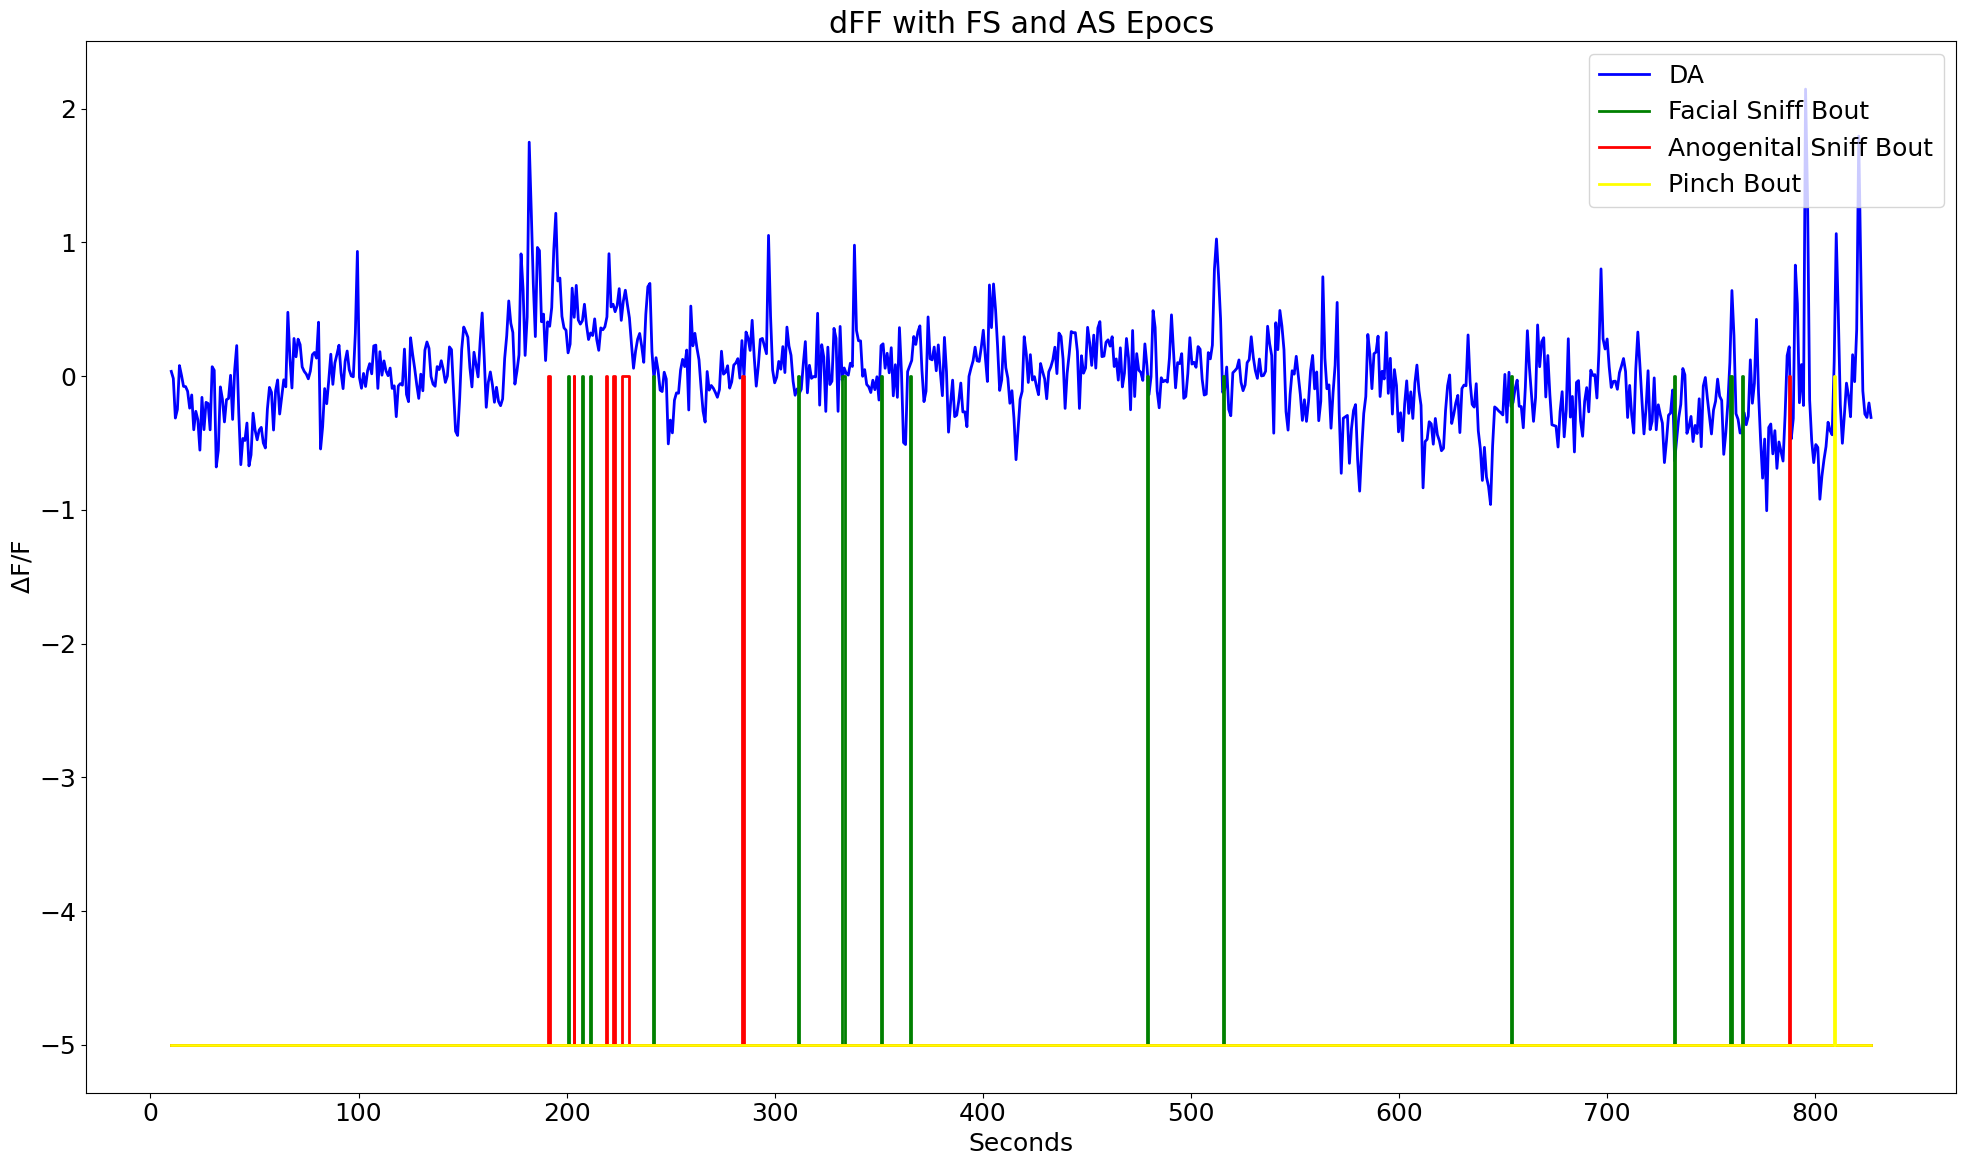

In [19]:
y_scale = 5 #adjust according to data needs
y_shift = -5 #scale and shift are just for aesthetics

# First subplot in a series: dFF with lick epocs
fig2 = plt.figure(figsize=(20,12))
ax2 = fig2.add_subplot(111)

p1, = ax2.plot(NAc_time, dFF, linewidth=2, color='blue', label='DA')
p2, = ax2.plot(FS_EVENT_x, y_scale*FS_EVENT_y+y_shift, linewidth=2, color='green', label='Facial Sniff Bout')
p3, = ax2.plot(AS_EVENT_x, y_scale*AS_EVENT_y+y_shift, linewidth=2, color='red', label='Anogenital Sniff Bout')
p4, = ax2.plot(PINCH_EVENT_x, y_scale*PINCH_EVENT_y+y_shift, linewidth=2, color='yellow', label='Pinch Bout')


ax2.set_ylabel(r'$\Delta$F/F')
ax2.set_xlabel('Seconds')
ax2.set_title('dFF with FS and AS Epocs')
ax2.legend(handles=[p1,p2,p3,p4], loc='upper right')
fig2.tight_layout()

### Make nice area fills instead of epocs for aesthetics

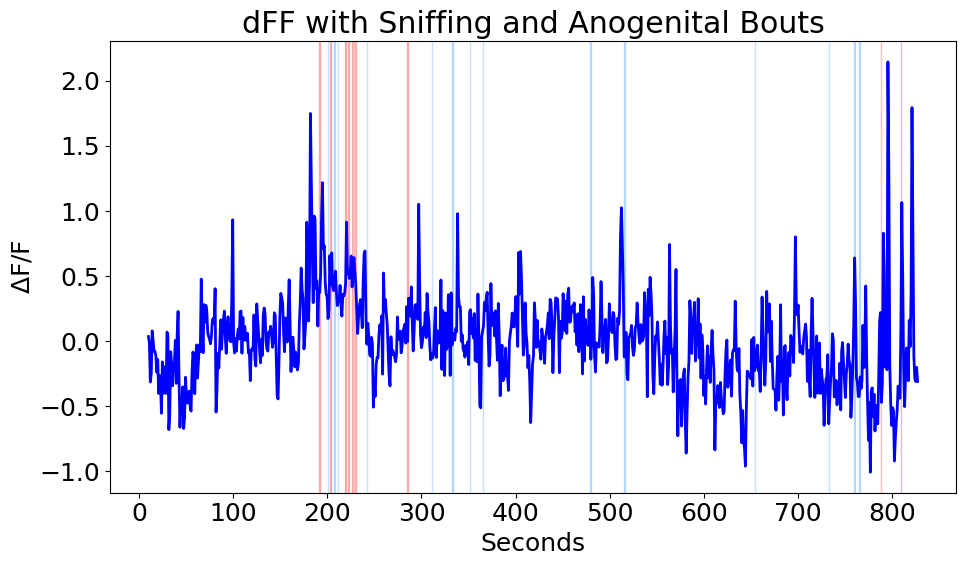

In [20]:
fig4 = plt.figure(figsize=(10,6))
ax5 = fig4.add_subplot(111)

p1, = ax5.plot(NAc_time, dFF,linewidth=2, color='blue', label='DA')
for on, off in zip(NAc_data.epocs[FS_EVENT].onset, NAc_data.epocs[FS_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='dodgerblue')
    
for on, off in zip(NAc_data.epocs[AS_EVENT].onset, NAc_data.epocs[AS_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='red')
    
for on, off in zip(NAc_data.epocs[PINCH_EVENT].onset, NAc_data.epocs[PINCH_EVENT].offset):
    ax5.axvspan(on, off, alpha=0.25, color='purple')
    
ax5.set_ylabel(r'$\Delta$F/F')
ax5.set_xlabel('Seconds')
ax5.set_title('dFF with Sniffing and Anogenital Bouts')
fig4.tight_layout()

## Make a Peri-Event Stimulus Plot

In [15]:
PRE_TIME = 5 # five seconds before event onset
POST_TIME = 5 # ten seconds after
fs = NAc_data.streams[DA].fs/N #recall we downsampled by N = 10 earlier

# time span for peri-event filtering, PRE and POST, in samples
TRANGE = [-PRE_TIME*np.floor(fs), POST_TIME*np.floor(fs)]

dFF_snips = []
array_ind = []
pre_stim = []
post_stim = []

for on in NAc_data.epocs[FS_EVENT].onset:
    # If the bout cannot include pre-time seconds before event, make zero
    if on < PRE_TIME:
        dFF_snips.append(np.zeros(TRANGE[1]-TRANGE[0]))
    else: 
        # find first time index after bout onset
        array_ind.append(np.where(NAc_time > on)[0][0])
        # find index corresponding to pre and post stim durations
        pre_stim.append(array_ind[-1] + TRANGE[0])
        post_stim.append(array_ind[-1] + TRANGE[1])
        dFF_snips.append(dFF[int(pre_stim[-1]):int(post_stim[-1])])

# Make all snippets the same size based on min snippet length
min1 = np.min([np.size(x) for x in dFF_snips])
dFF_snips = [x[1:min1] for x in dFF_snips]

mean_dFF_snips = np.mean(dFF_snips, axis=0)
std_dFF_snips = np.std(mean_dFF_snips, axis=0)

peri_time = np.linspace(1, len(mean_dFF_snips), len(mean_dFF_snips))/fs - PRE_TIME

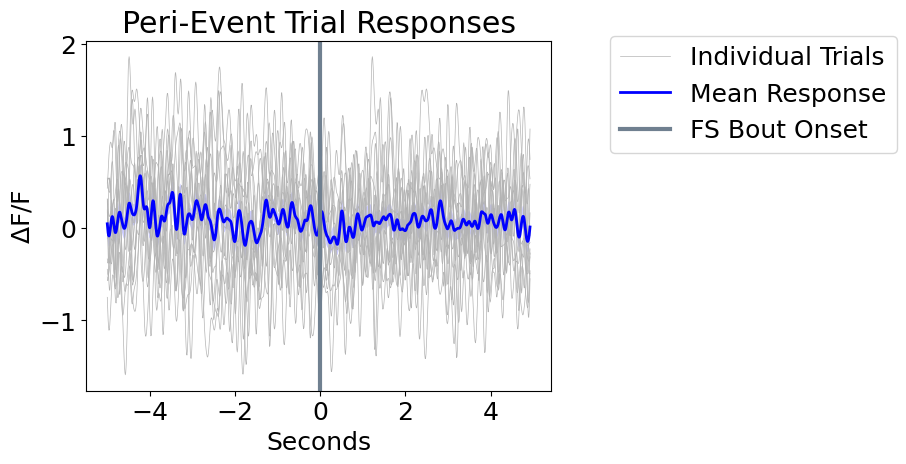

In [16]:
fig5 = plt.figure(figsize=(6,10))
ax6 = fig5.add_subplot(211)

for snip in dFF_snips:
    p1, = ax6.plot(peri_time, snip, linewidth=.5, color=[.7, .7, .7], label='Individual Trials')
p2, = ax6.plot(peri_time, mean_dFF_snips, linewidth=2, color='blue', label='Mean Response')

# Plotting standard error bands
p3 = ax6.fill_between(peri_time, mean_dFF_snips+std_dFF_snips, 
                      mean_dFF_snips-std_dFF_snips, facecolor='blue', alpha=0.2)
p4 = ax6.axvline(x=0, linewidth=3, color='slategray', label='FS Bout Onset')

ax6.axis('tight')
ax6.set_xlabel('Seconds')
ax6.set_ylabel(r'$\Delta$F/F')
ax6.set_title('Peri-Event Trial Responses')
ax6.legend(handles=[p1, p2, p4], bbox_to_anchor=(1.1, 1.05));

In [17]:
PRE_TIME = 5 # five seconds before event onset
POST_TIME = 5 # ten seconds after
fs = NAc_data.streams[DA].fs/N #recall we downsampled by N = 10 earlier

# time span for peri-event filtering, PRE and POST, in samples
TRANGE = [-PRE_TIME*np.floor(fs), POST_TIME*np.floor(fs)]

dFF_snips = []
array_ind = []
pre_stim = []
post_stim = []

for on in NAc_data.epocs[AS_EVENT].onset:
    # If the bout cannot include pre-time seconds before event, make zero
    if on < PRE_TIME:
        dFF_snips.append(np.zeros(TRANGE[1]-TRANGE[0]))
    else: 
        # find first time index after bout onset
        array_ind.append(np.where(NAc_time > on)[0][0])
        # find index corresponding to pre and post stim durations
        pre_stim.append(array_ind[-1] + TRANGE[0])
        post_stim.append(array_ind[-1] + TRANGE[1])
        dFF_snips.append(dFF[int(pre_stim[-1]):int(post_stim[-1])])

# Make all snippets the same size based on min snippet length
min1 = np.min([np.size(x) for x in dFF_snips])
dFF_snips = [x[1:min1] for x in dFF_snips]

mean_dFF_snips = np.mean(dFF_snips, axis=0)
std_dFF_snips = np.std(mean_dFF_snips, axis=0)

peri_time = np.linspace(1, len(mean_dFF_snips), len(mean_dFF_snips))/fs - PRE_TIME

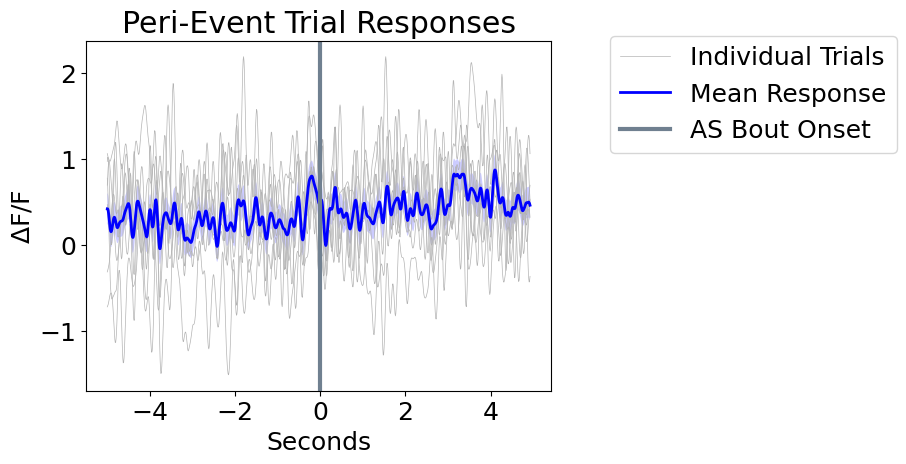

In [18]:
fig5 = plt.figure(figsize=(6,10))
ax6 = fig5.add_subplot(211)

for snip in dFF_snips:
    p1, = ax6.plot(peri_time, snip, linewidth=.5, color=[.7, .7, .7], label='Individual Trials')
p2, = ax6.plot(peri_time, mean_dFF_snips, linewidth=2, color='blue', label='Mean Response')

# Plotting standard error bands
p3 = ax6.fill_between(peri_time, mean_dFF_snips+std_dFF_snips, 
                      mean_dFF_snips-std_dFF_snips, facecolor='blue', alpha=0.2)
p4 = ax6.axvline(x=0, linewidth=3, color='slategray', label='AS Bout Onset')

ax6.axis('tight')
ax6.set_xlabel('Seconds')
ax6.set_ylabel(r'$\Delta$F/F')
ax6.set_title('Peri-Event Trial Responses')
ax6.legend(handles=[p1, p2, p4], bbox_to_anchor=(1.1, 1.05));